/Users/charlie/opt/anaconda3/envs/quantum/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/charlie/opt/anaconda3/envs/quantum/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/charlie/opt/anaconda3/envs/quantum/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/charlie/opt/anaconda3/envs/quantum/lib/python3.10/site-packages/sklearn/cluster/_kme

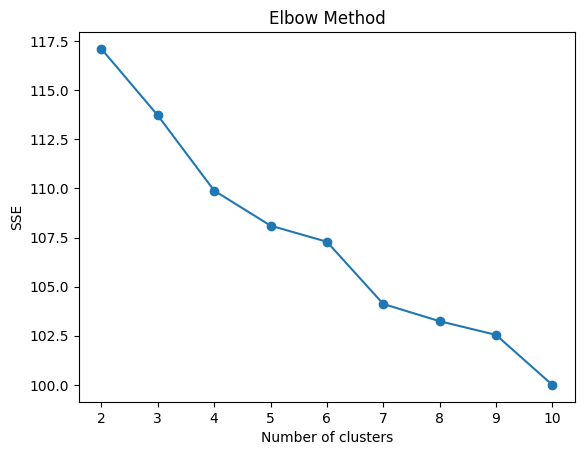

In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

df = pd.read_csv("../../data/program/text.csv")

text_data = df["description"].values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X.toarray())

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()



In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 根据SSE-k曲线确定最佳聚类数
best_k = 5  # 通过观察图像得出

# 实例化KMeans模型
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X_pca)

# 对降维后的数据进行聚类
# labels = kmeans.fit_predict(X_pca)

# 使用t-SNE算法进行降维
tsne = TSNE(n_components=2, perplexity=10, random_state=0)
X_tsne = tsne.fit_transform(X)

# 可视化聚类结果
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 根据SSE-k曲线确定最佳聚类数
best_k = 5  # 通过观察图像得出

# 实例化KMeans模型
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X_pca)

# 对降维后的数据进行聚类
# labels = kmeans.fit_predict(X_pca)

# 使用t-SNE算法进行降维
tsne = TSNE(n_components=3, perplexity=80, random_state=0)
X_tsne = tsne.fit_transform(X)

# 可视化聚类结果
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=120)

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=kmeans.labels_, s=150, alpha=0.8, edgecolors='none')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# # 隐藏背景面和网格线
# ax.xaxis.pane.set_visible(False)
# ax.yaxis.pane.set_visible(False)
# ax.zaxis.pane.set_visible(False)
# ax.grid(False)

# # 隐藏图例
# plt.legend().set_visible(False)
plt.show()


In [ ]:


# # 将聚类结果添加到DataFrame中
# df["cluster"] = labels

# # 输出每个聚类的数据量
# print(df["cluster"].value_counts())

# # 输出每个聚类的名称列表
# for i in range(best_k):
#     print(f"Cluster {i}:")
#     print(df[df["cluster"] == i]["program"].values)
#     print()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 定义关键词列表
keywords = [
  ["cat", "dog", "pet"],
  ["python", "java", "ruby"],
  ["apple", "banana", "orange"],
  ["book", "movie", "music"]
]

# 将关键词列表转换为向量表示形式
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform([' '.join(k) for k in keywords]).toarray()

# 使用K-Means算法进行聚类
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 使用t-SNE算法进行降维
tsne = TSNE(n_components=2, perplexity=10, random_state=0)
X_tsne = tsne.fit_transform(X)

# 可视化聚类结果
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.show()


In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 构造数据
keyword_list = [
    ["data", "science", "machine"],
    ["artificial", "intelligence", "learning"],
    ["big", "analytics", "statistics"],
    ["algorithm", "model", "neural"],
    ["programming", "code", "developer"],
    ["database", "sql", "nosql"]
]
data = np.random.rand(len(keyword_list), 3)

# 可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
for i in range(len(keyword_list)):
    ax.scatter(data[i, 0], data[i, 1], data[i, 2], color='b')
    ax.text(data[i, 0], data[i, 1], data[i, 2], keyword_list[i][0], color='r')

# 设置坐标轴标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 关键词列表
keyword_list = [
    ['data', 'analysis', 'visualization'],
    ['machine', 'learning', 'neural'],
    ['big', 'data', 'analytics'],
    ['algorithm', 'model', 'optimization'],
    ['programming', 'code', 'developer'],
    ['database', 'sql', 'nosql']
]

# 将每个关键词转化为一个三维坐标点
data = np.array([[i, j, k] for i, j, k in keyword_list])

# 创建可视化图形
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=120)

# 绘制数据点
ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=150, alpha=0.8, edgecolors='none', c='red')

# 添加关键词标签
for i, keyword in enumerate(keyword_list):
    ax.text(data[i, 0], data[i, 1], data[i, 2], keyword[0], color='black', fontsize=10)

# 设置坐标轴标签
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# 调整坐标轴范围
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# 隐藏坐标轴
ax.xaxis.pane.set_visible(False)
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(False)

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# 隐藏背景面和网格线
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.grid(False)

# 显示图形
plt.show()
